In [59]:
# General Libs
# https://www.kaggle.com/code/mauriciofigueiredo/fruit-classification-with-a-simple-cnn/notebook
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
im_shape = (348,348)

TRAINING_DIR = '../dataset/train'
TEST_DIR = '../dataset/test'

seed = 10

BATCH_SIZE = 16

In [61]:
#Using keras ImageGenerator and flow_from_directoty

# Subdivision in test/validation
data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)
val_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [62]:
# If you want data augmentation, uncomment and run this cell
data_generator = ImageDataGenerator(
        validation_split=0.2,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

val_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [63]:
# Generator para parte train
train_generator = data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=True, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="training")
# Generator para parte validação
validation_generator = val_data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="validation")

# Generator para dataset de teste
test_generator = ImageDataGenerator(rescale=1./255)
test_generator = test_generator.flow_from_directory(TEST_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE)

nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples
nb_test_samples = test_generator.samples
classes = list(train_generator.class_indices.keys())
print('Classes: '+str(classes))
num_classes  = len(classes)

Found 324 images belonging to 5 classes.
Found 80 images belonging to 5 classes.
Found 50 images belonging to 5 classes.
Classes: ['aguacate', 'kiwi', 'limon', 'naranja', 'piña']


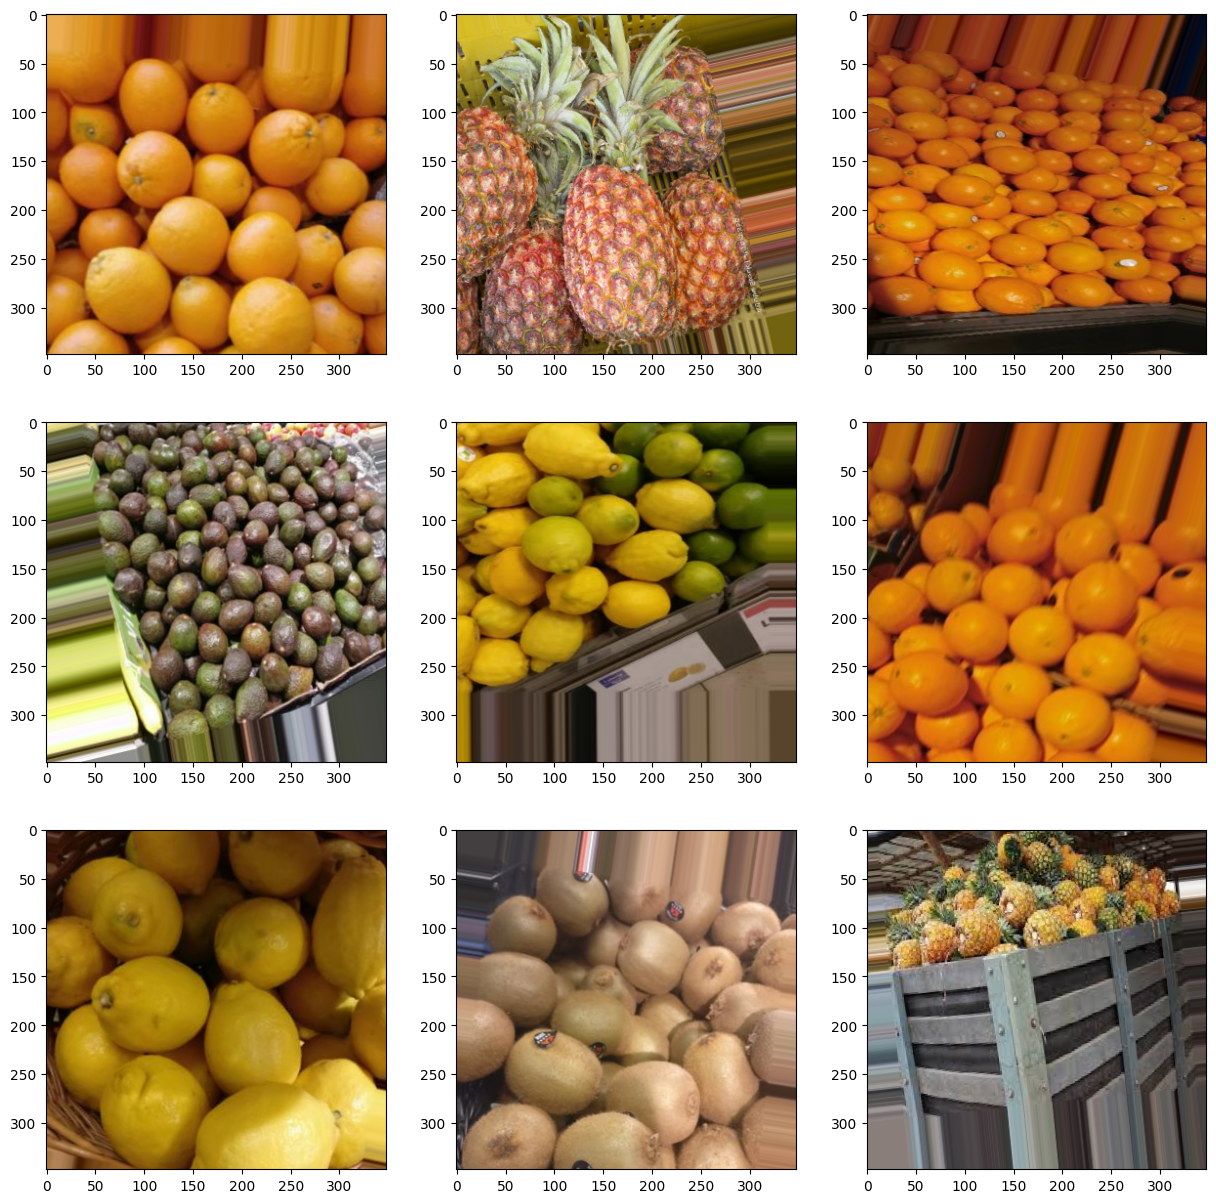

In [64]:
# Visualizing some examples
plt.figure(figsize=(15,15))
for i in range(9):
    #gera subfigures
    plt.subplot(330 + 1 + i)
    batch = train_generator.next()[0]*255
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

In [65]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(im_shape[0],im_shape[1],3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(100, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

# Compila o modelo
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 346, 346, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 173, 173, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 171, 171, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 85, 85, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 85, 85, 64)        0         
                                                                 
 flatten_3 (Flatten)         (None, 462400)           

In [66]:
epochs = 80

#Callback to save the best model
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='../model/model.h5',
        monitor='val_loss', save_best_only=True, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,verbose=1)
]

#Training
history = model.fit(
        train_generator,
        steps_per_epoch=nb_train_samples // BATCH_SIZE,
        epochs=epochs,
        callbacks = callbacks_list,
        validation_data=validation_generator,
        verbose = 1,
        validation_steps=nb_validation_samples // BATCH_SIZE)

Epoch 1/80
20/20 [==============================] - ETA: 0s - loss: 6.2980 - accuracy: 0.2143
Epoch 1: val_loss improved from inf to 1.54219, saving model to model.h5
20/20 [==============================] - 27s 1s/step - loss: 6.2980 - accuracy: 0.2143 - val_loss: 1.5422 - val_accuracy: 0.2000
Epoch 2/80
20/20 [==============================] - ETA: 0s - loss: 1.4392 - accuracy: 0.3019
Epoch 2: val_loss improved from 1.54219 to 1.40149, saving model to model.h5
20/20 [==============================] - 25s 1s/step - loss: 1.4392 - accuracy: 0.3019 - val_loss: 1.4015 - val_accuracy: 0.4125
Epoch 3/80
20/20 [==============================] - ETA: 0s - loss: 1.3098 - accuracy: 0.4545
Epoch 3: val_loss improved from 1.40149 to 1.28655, saving model to model.h5
20/20 [==============================] - 25s 1s/step - loss: 1.3098 - accuracy: 0.4545 - val_loss: 1.2866 - val_accuracy: 0.4250
Epoch 4/80
20/20 [==============================] - ETA: 0s - loss: 1.1252 - accuracy: 0.4968
Epoch 4: v

Epoch 30/80
20/20 [==============================] - ETA: 0s - loss: 0.2821 - accuracy: 0.8896
Epoch 30: val_loss did not improve from 0.29929
20/20 [==============================] - 23s 1s/step - loss: 0.2821 - accuracy: 0.8896 - val_loss: 0.4829 - val_accuracy: 0.8375
Epoch 31/80
20/20 [==============================] - ETA: 0s - loss: 0.2767 - accuracy: 0.8994
Epoch 31: val_loss did not improve from 0.29929
20/20 [==============================] - 23s 1s/step - loss: 0.2767 - accuracy: 0.8994 - val_loss: 0.4475 - val_accuracy: 0.8625
Epoch 32/80
20/20 [==============================] - ETA: 0s - loss: 0.2957 - accuracy: 0.8831
Epoch 32: val_loss improved from 0.29929 to 0.28398, saving model to model.h5
20/20 [==============================] - 24s 1s/step - loss: 0.2957 - accuracy: 0.8831 - val_loss: 0.2840 - val_accuracy: 0.8875
Epoch 33/80
20/20 [==============================] - ETA: 0s - loss: 0.2936 - accuracy: 0.8831
Epoch 33: val_loss did not improve from 0.28398
20/20 [====

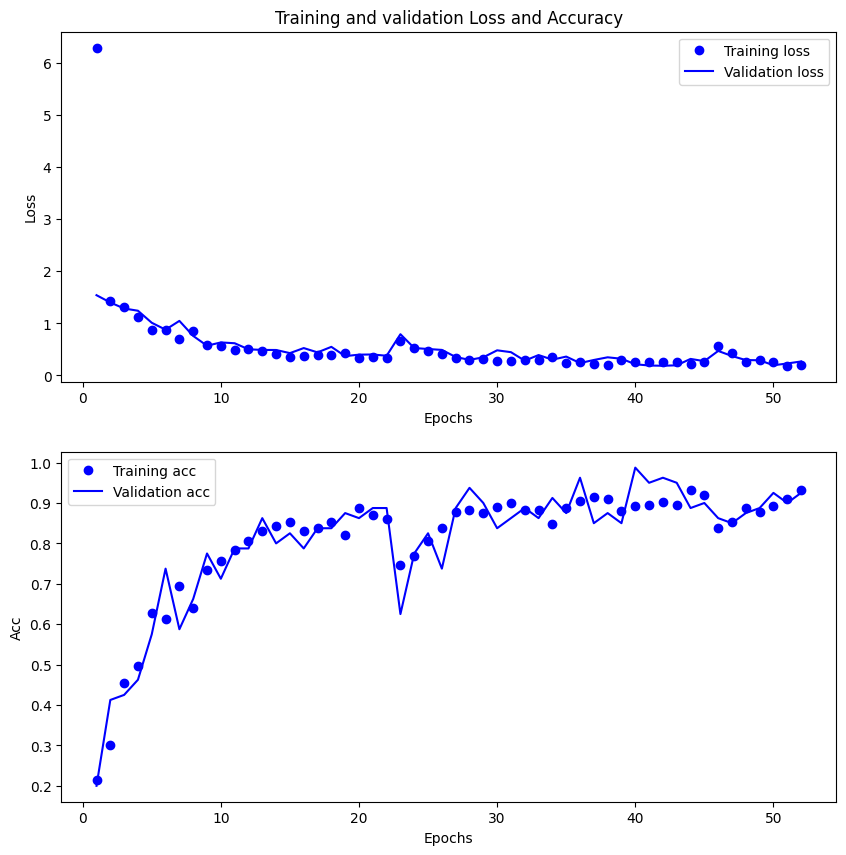

In [67]:
# Training curves
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs_x = range(1, len(loss_values) + 1)
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(epochs_x, loss_values, 'bo', label='Training loss')
plt.plot(epochs_x, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(2,1,2)
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs_x, acc_values, 'bo', label='Training acc')
plt.plot(epochs_x, val_acc_values, 'b', label='Validation acc')
#plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [68]:
# Load the best saved model
from tensorflow.keras.models import load_model

model = load_model('model.h5')

In [69]:
# Using the validation dataset
score = model.evaluate(validation_generator)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

5/5 [==============================] - 1s 195ms/step - loss: 0.1863 - accuracy: 0.9625
Val loss: 0.18629494309425354
Val accuracy: 0.9624999761581421


In [70]:
# Using the test dataset
score = model.evaluate(test_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 1s 176ms/step - loss: 2.9209 - accuracy: 0.7800
Test loss: 2.920867919921875
Test accuracy: 0.7799999713897705


In [71]:
import itertools

#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

5/5 [==============================] - 1s 213ms/step
Classification Report
              precision    recall  f1-score   support

    aguacate       0.88      0.94      0.91        16
        kiwi       1.00      1.00      1.00        16
       limon       1.00      1.00      1.00        16
     naranja       1.00      1.00      1.00        16
        piña       0.93      0.88      0.90        16

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80



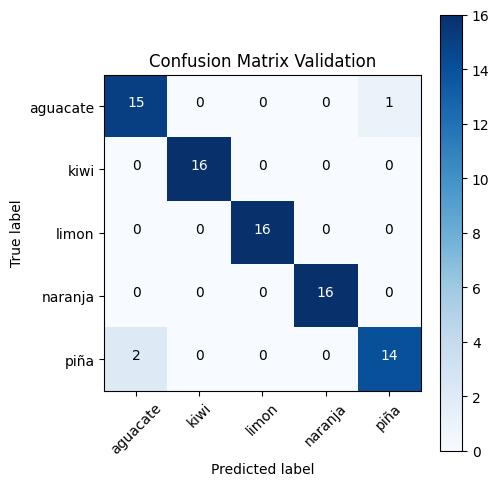

In [73]:
# Some reports
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

#On test dataset
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
target_names = classes

#Confution Matrix
cm = confusion_matrix(validation_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix Validation')

#Classification Report
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

4/4 [==============================] - 1s 204ms/step
Classification Report
              precision    recall  f1-score   support

    aguacate       0.67      0.40      0.50        10
        kiwi       1.00      0.70      0.82        10
       limon       1.00      0.90      0.95        10
     naranja       1.00      1.00      1.00        10
        piña       0.50      0.90      0.64        10

    accuracy                           0.78        50
   macro avg       0.83      0.78      0.78        50
weighted avg       0.83      0.78      0.78        50



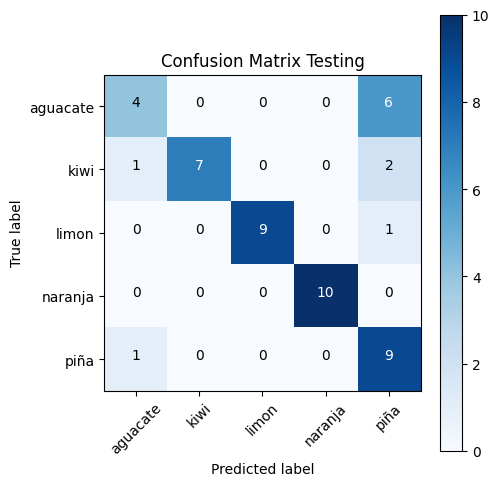

In [77]:
# Some reports
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

#On test dataset
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
target_names = classes

#Confution Matrix
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix Testing')

#Classification Report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))